In [1]:
def dwell(dwell_time=1):
    import time
    time.sleep(1)

In [2]:
dwell()

In [8]:
def timeit(function_to_time, num_reps=7):
    import time
    
    observations = []
    for rep in range(num_reps):
        start_time = time.time()
        function_to_time()
        end_time = time.time()
        elapsed = (end_time-start_time)
        observations.append(elapsed)
    return observations

In [9]:
timeit(dwell)

[1.0010957717895508,
 1.0009996891021729,
 1.001067876815796,
 1.001079797744751,
 1.0001499652862549,
 1.001044750213623,
 1.0005979537963867]

In [38]:
import numpy as np
import random

import scipy.stats as st

In [45]:
size = 1000

loc_range = (1, 100)
scale_range = (1, 25)

reps = 10
data_dict = {}
for i in range(reps):
    c_loc = np.random.uniform(
        low = loc_range[0],
        high = loc_range[1]
    )
    c_scale = np.random.uniform(
        low = scale_range[0],
        high = scale_range[1]
    )
    data_dict[i+1] = {
        'data': np.random.normal(
            loc = c_loc,
            scale = c_scale,
            size = size
        ).tolist()
    }

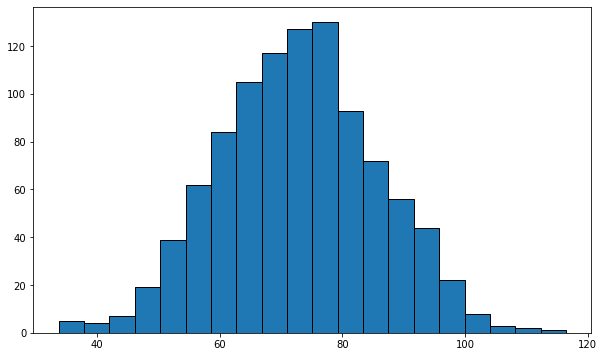

In [52]:
import matplotlib.pyplot as plt

fgi, ax = plt.subplots(1, 1, figsize = (10, 6))

ax.hist(
    data_dict[1]['data'],
    bins = 20,
    edgecolor='k',
)

plt.show()

In [61]:
all_keys = list(data_dict.keys())
for ckey in data_dict.keys():
    cdata = data_dict[ckey]['data']
    params = st.norm.fit(cdata)
    my_generator = st.norm.freeze(*params)
    data_dict[ckey]['generator'] = my_generator
    data_dict[ckey]['mean'] = my_generator.mean()
    data_dict[ckey]['std'] = my_generator.std()

In [70]:
data_dict[1]['generator'].rvs(10)

array([ 74.40763737,  86.64944943,  54.37334193,  96.88025624,
       104.76922755,  69.731929  ,  84.17945205,  85.70853588,
        77.64487421,  79.44989334])

Starting 1


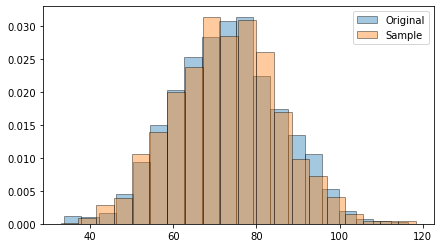

--------------------------------------------------
Starting 2


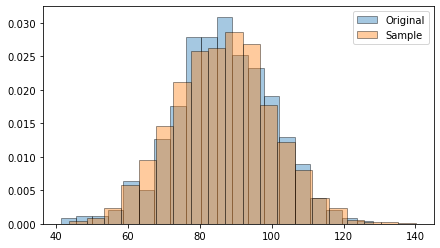

--------------------------------------------------
Starting 3


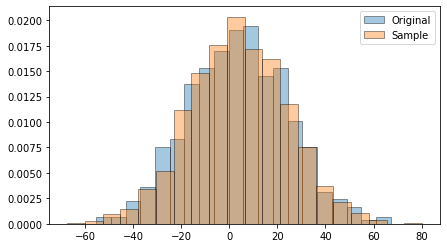

--------------------------------------------------
Starting 4


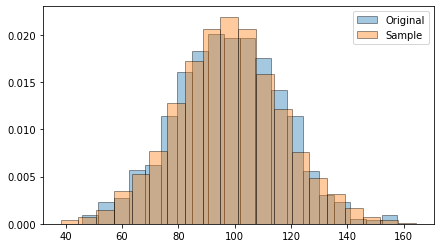

--------------------------------------------------
Starting 5


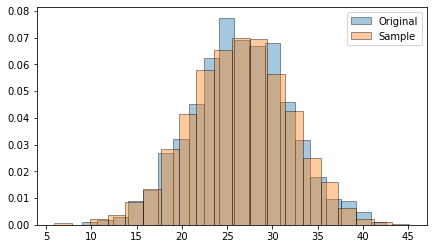

--------------------------------------------------
Starting 6


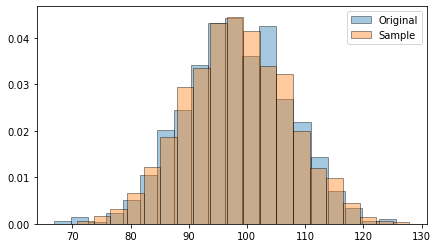

--------------------------------------------------
Starting 7


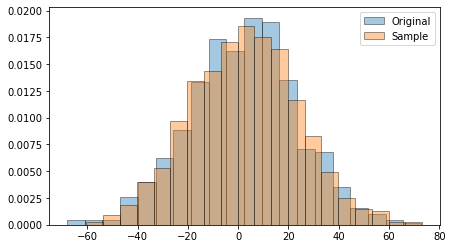

--------------------------------------------------
Starting 8


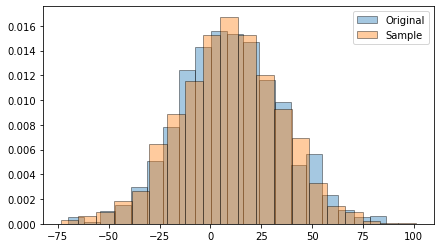

--------------------------------------------------
Starting 9


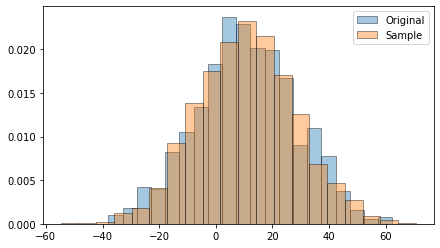

--------------------------------------------------
Starting 10


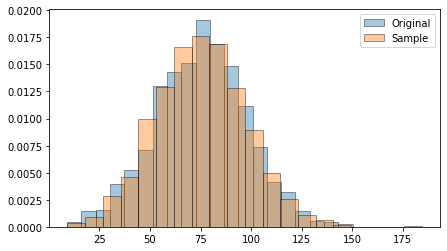

--------------------------------------------------


In [73]:
rvs_to_generate = 2500

for key, key_data in data_dict.items():
    print(f'Starting {key}')
    
    fig, ax = plt.subplots(1, 1, figsize = (7, 4))

    ax.hist(
        key_data['data'],
        alpha = 0.4,
        bins = 20,
        density = True,
        label='Original',
        edgecolor='k',
    )
    my_rvs = key_data['generator'].rvs(rvs_to_generate)
    ax.hist(
        my_rvs,
        alpha = 0.4,
        bins = 20,
        label='Sample',
        density = True,
        edgecolor='k',
    )
    ax.legend(loc=0)
    plt.show()
    
    print('-'*50)